# Exploratory Data Analysis


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,chi2_contingency
import warnings
warnings.simplefilter("ignore")

### - <u>Importing our Data Set</u>

In [18]:
df = pd.read_csv('C:\\Users\\91880\\Downloads\\customerchurnprediction.csv', delimiter=',')
#Shape of the dataset.
df.shape

(10000, 14)


<div class="alert alert-block alert-info">
INSIGHT : There are 10000 rows of observations corresponding to 14 features in the dataset.




In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
#Checking for the missing value in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB



<div class="alert alert-block alert-info">
<b>INSIGHT : There are no missing values in the dataset</b> 


In [21]:
#Removing columns from data which are not needed for further analysis.
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
#Extracting columns/features name present in new dataset.
df.columns


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<div class="alert alert-block alert-info">
INSIGHT : After removing robust columns/features from the dataset,now there are 10000 rows of observations corresponding to 11 features in the new dataset.

In [146]:
len(df[df.duplicated()])

0

## DATA OVERVIEW

In [22]:
#Finding various statistics of different features present in dataset.
df.describe(include = ['float64','int64'])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<div class="alert alert-block alert-info">
    
# Univariate Analysis
#### 1.We explore variables one by one.
#### 2.Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.
***


## <u>Univariate Analysis of Categorical Variables</u>
#### 1.A common way to summarize categorical variables is with a frequency table.
#### 2.To visualize we will use a bar chart.
#### 3. Insights

In [148]:
freq_table_Geo=df.groupby(["Geography"]).size().reset_index(name="Count")
freq_table_Geo["Count %"]=freq_table_Geo["Count"]*100/sum(freq_table_Geo["Count"])

freq_table_Gender=df.groupby(["Gender"]).size().reset_index(name="Count")
freq_table_Gender["Count %"]=freq_table_Gender["Count"]*100/sum(freq_table_Gender["Count"])

freq_table_Pro=df.groupby(["NumOfProducts"]).size().reset_index(name="Count")
freq_table_Pro["Count %"]=freq_table_Pro["Count"]*100/sum(freq_table_Pro["Count"])

freq_table_CrCard=df.groupby(["HasCrCard"]).size().reset_index(name="Count")
freq_table_CrCard["Count %"]=freq_table_CrCard["Count"]*100/sum(freq_table_CrCard["Count"])

freq_table_Active=df.groupby(["IsActiveMember"]).size().reset_index(name="Count")
freq_table_Active["Count %"]=freq_table_Active["Count"]*100/sum(freq_table_Active["Count"])

freq_table_Exited=df.groupby(["Exited"]).size().reset_index(name="Count")
freq_table_Exited["Count %"]=freq_table_Exited["Count"]*100/sum(freq_table_Exited["Count"])

freq_table_Tenure=df.groupby(["Tenure"]).size().reset_index(name="Count")
freq_table_Tenure["Count %"]=freq_table_Tenure["Count"]*100/sum(freq_table_Tenure["Count"])

### - <u>_The various Categorical Variables in our Data Set is as follows_</u>:
#### 1. Geography
#### 2. Gender
#### 3.Tenure
#### 4.Number of Products
#### 5. Has Credit Card
#### 6. Is Active Member
#### 7. Exited 
<b>We will study each feature one by one using frequency table and visualize them using bar chart followed by our insights


### 1.GEOGRAPHY


### FREQUENCY TABLE

In [149]:
freq_table_Geo



,Geography,Count,Count %
0,France,5014,50.14
1,Germany,2509,25.09
2,Spain,2477,24.77


### BAR CHART

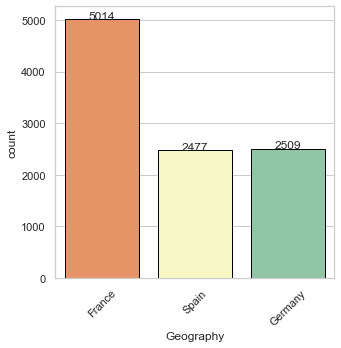

In [150]:
fig, ax = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax,x='Geography', data=df,ec="black",palette='Spectral')
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<div class="alert alert-block alert-info">
  
    
#### *Here we can see our data set has maximum number of people from France followed by Germany and least are from Spain.*

### 2.GENDER

### FREQUENCY TABLE

In [151]:
freq_table_Gender


,Gender,Count,Count %
0,Female,4543,45.43
1,Male,5457,54.57


### BAR CHART

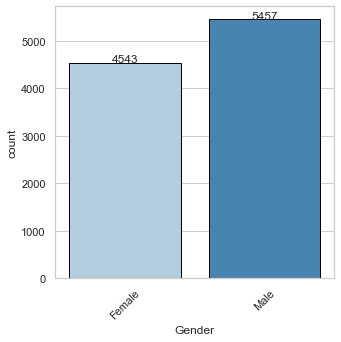

In [152]:
fig, ax = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax,x='Gender', data=df,ec="black",palette="Blues")
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


<div class="alert alert-block alert-info">
    
#### *The count of Females is comparitively less than that of Males in our data.*

### 3.TENURE
### FREQUENCY TABLE

In [153]:
freq_table_Tenure


,Tenure,Count,Count %
0,0,413,4.13
1,1,1035,10.35
2,2,1048,10.48
3,3,1009,10.09
4,4,989,9.89
5,5,1012,10.12
6,6,967,9.67
7,7,1028,10.28
8,8,1025,10.25
9,9,984,9.84


### BAR CHART

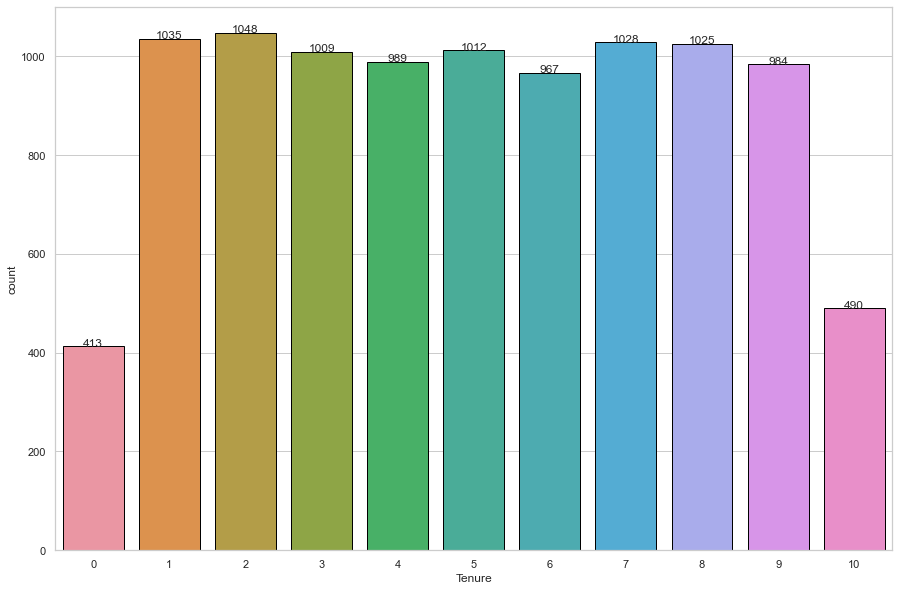

In [154]:
fig, ax = plt.subplots(figsize=(15,10))
graph = sns.countplot(ax=ax,x='Tenure', data=df,ec="black")
graph.set_xticklabels(graph.get_xticklabels(),rotation=0)
for p in graph.patches:
    height = p.get_height()

    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<div class="alert alert-block alert-info">
    
#### *Almost equal number of customers in different tenure groups, except 0 and 10.*



### 4. NUMBER OF PRODUCTS

### FREQUENCY TABLE

In [155]:
freq_table_Pro

,NumOfProducts,Count,Count %
0,1,5084,50.84
1,2,4590,45.90
2,3,266,2.66
3,4,60,0.60


### BAR CHART

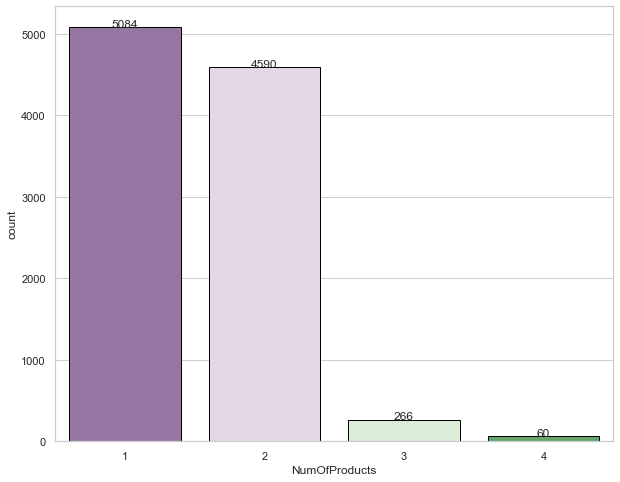

In [156]:
fig, ax = plt.subplots(figsize=(10,8))
graph = sns.countplot(ax=ax,x='NumOfProducts', data=df,ec="black",palette="PRGn")
graph.set_xticklabels(graph.get_xticklabels(),rotation=0)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<div class="alert alert-block alert-info">
        
#### *Most of the customers use one or two number of products, with a very few use three or four products*



### 5. HAS CREDIT CARD
### FREQUENCY TABLE

In [157]:
freq_table_CrCard

,HasCrCard,Count,Count %
0,0,2945,29.45
1,1,7055,70.55


### BAR CHART

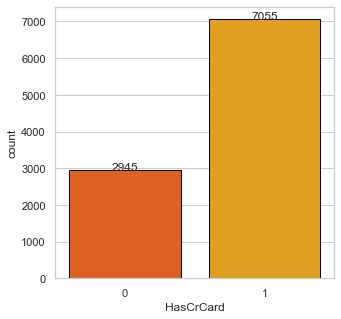

In [158]:
fig, ax = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax,x='HasCrCard', data=df,ec="black",palette="autumn")
graph.set_xticklabels(graph.get_xticklabels(),rotation=0)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<div class="alert alert-block alert-info">
    
#### *Majority of Customers have Bank's Credit Card*

### 6. IS ACTIVE MEMBER
### FREQUENCY TABLE

In [159]:
freq_table_Active

,IsActiveMember,Count,Count %
0,0,4849,48.49
1,1,5151,51.51


### BAR CHART

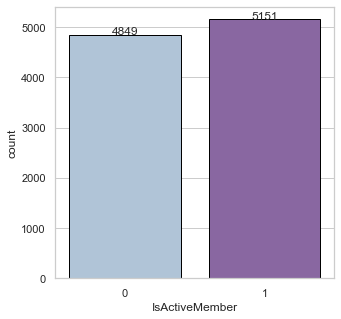

In [160]:
fig, ax = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax,x='IsActiveMember', data=df,ec="black",palette="BuPu")
graph.set_xticklabels(graph.get_xticklabels(),rotation=0)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<div class="alert alert-block alert-info">
    
#### *Almost equal number of active and inactive members in our Bank*

### 7. EXITED
#### The count of Females is comparitively less than that of Males in our data.
### FREQUENCY TABLE

In [161]:
freq_table_Exited


,Exited,Count,Count %
0,0,7963,79.63
1,1,2037,20.37


### BAR CHART

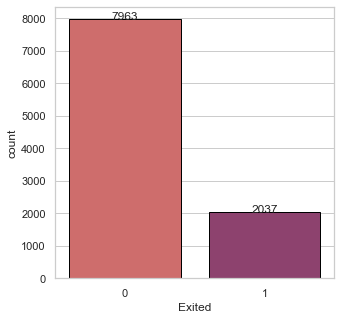

In [162]:
fig, ax = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax,x='Exited', data=df,ec="black",palette="flare")
graph.set_xticklabels(graph.get_xticklabels(),rotation=0)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<div class="alert alert-block alert-info">
    
#### *Most of our customers did not churn*
#### *Since the ratio for churners to non churners is approximately 80:20 so dataset is highly imbalance.*

## <u> Univariate Analysis of Numerical Variables</u>
### - Numerical data can be visualized with a histogram. Histograms are a great first analysis of continuous data. 


### - _The various Numerical Variables in our Data Set is as follows_:
#### 1. Credit Score
#### 2. Age
#### 3.Balance
#### 4.Estimated Salary
### _We will study each feature one by one using histogram_



### 1.  CREDIT SCORE
### HISTOGRAM

Text(0, 0.5, 'Count')

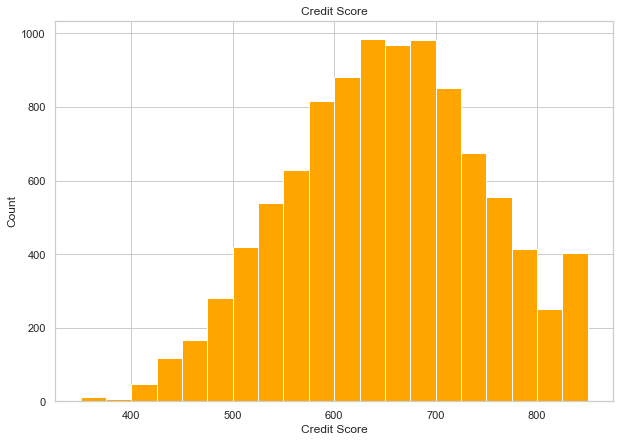

In [163]:
plt.figure(figsize=(10,7))
x=df["CreditScore"]
plt.hist(x,bins=20,color="orange")
plt.title("Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Count")

<div class="alert alert-block alert-info">
    
#### *Credit Score is left skewed.*


### 2. AGE
### HISTOGRAM


Text(0, 0.5, 'Count')

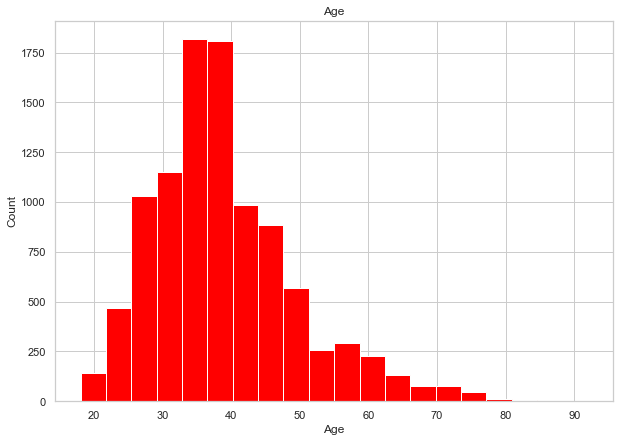

In [164]:
plt.figure(figsize=(10,7))
x=df["Age"]
plt.hist(x,bins=20,color="red")
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Count")

<div class="alert alert-block alert-info">
    
#### *Age is a bit right skewed*

### 3. BALANCE 
### HISTOGRAM

Text(0, 0.5, 'Count')

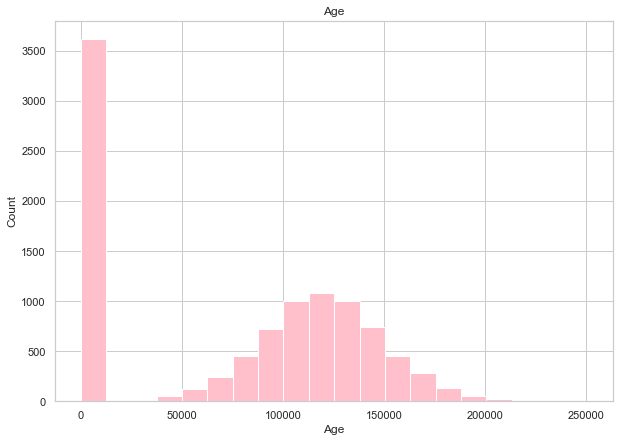

In [165]:
plt.figure(figsize=(10,7))
x=df["Balance"]
plt.hist(x,bins=20,color="pink")
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Count")

<div class="alert alert-block alert-info">
    
#### *If we ignore the customers having balance as zero, we see that balance is fairly normal distributed*

### 4. ESTIMATED SALARY
### HISTOGRAM


Text(0, 0.5, 'Count')

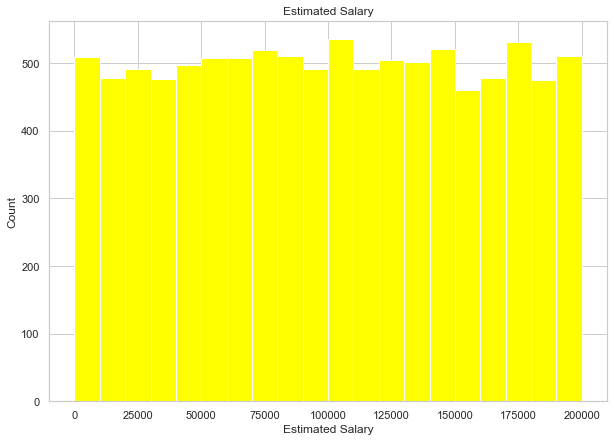

In [166]:
plt.figure(figsize=(10,7))
x=df["EstimatedSalary"]
plt.hist(x,bins=20,color="yellow")
plt.title("Estimated Salary")
plt.xlabel("Estimated Salary")
plt.ylabel("Count")

<div class="alert alert-block alert-info">
    
#### *Data contains approximately same number of customers from each salary interval.*

***
# Bivariate Analysis
#### 1.We perform bi-variate analysis with 2 variables for any combination of categorical and continuous variables.
#### 2.The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.
#### 3.Different methods are used to tackle these combinations during analysis process.
***
## 1. Categorical & Continuous

## 1 (A) : Studying the relationship between Credit Score and Exited

(200.0, 1000.0)

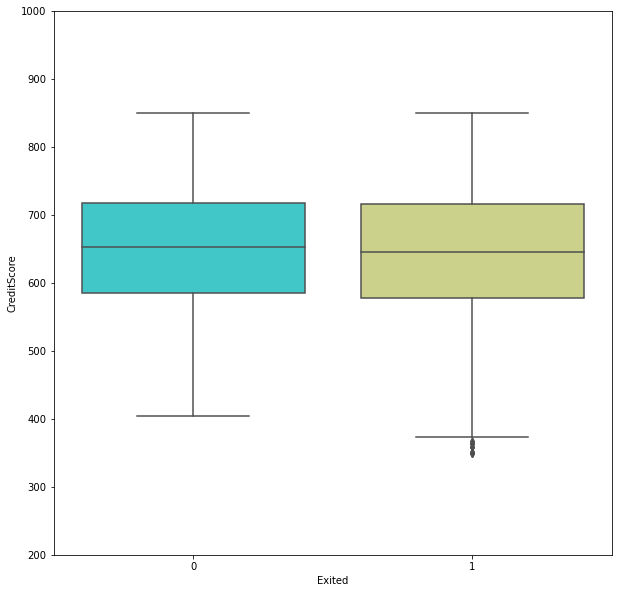

In [26]:
fig_dims = (10,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Exited',y='CreditScore',ax=ax,data = df,palette='rainbow');
plt.ylim(200, 1000)

Text(0.5, 1.0, 'CreditScore by churn')

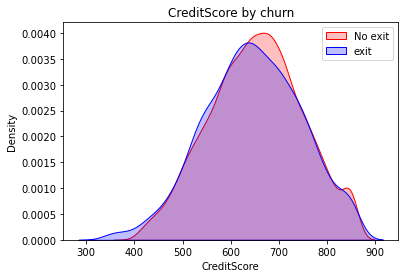

In [31]:
#CreditScore versus Exited
cs = sns.kdeplot(df.CreditScore[(df["Exited"] == 0)],
                color="Red", shade = True)
cs = sns.kdeplot(df.CreditScore[(df["Exited"] == 1)],
                ax = cs , color="Blue", shade = True)
cs.legend(["No exit","exit"], loc = 'upper right')
cs.set_ylabel('Density')
cs.set_xlabel('CreditScore')
cs.set_title('CreditScore by churn')

<div class="alert alert-block alert-info">

#### _Overall similar distribution. Some customers with extremely low credit score (on the left tail) as well as with high credit score also churned, it indicates that really low and high quality customer are easily churn than the average quality customer._

## 1 (B) : Studying the relationship between Balance and Exited

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

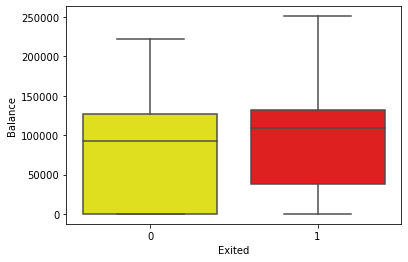

In [32]:
sns.boxplot(df['Exited'],df['Balance'],palette={'red','yellow'})

<AxesSubplot:xlabel='Balance', ylabel='Density'>

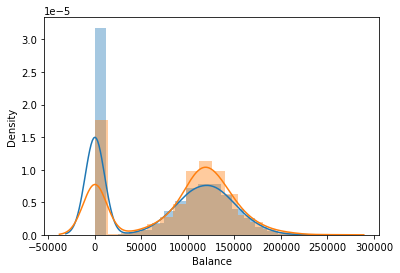

In [25]:
sns.distplot(df[df['Exited']==0]['Balance'])
sns.distplot(df[df['Exited']==1]['Balance'])

<div class="alert alert-block alert-info">

#### *Distribution of the two groups are quite similiar. Surprisingly some non-churned customers have lower balance than churned customers.*


## 1 (C) : Studying the relationship between Estimated Salary and Exited

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

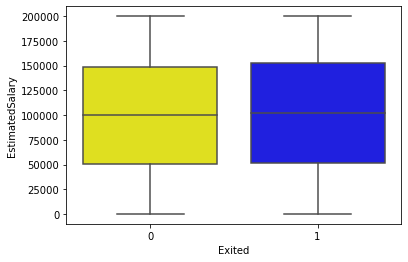

In [33]:
sns.boxplot(df['Exited'],df['EstimatedSalary'],palette={'yellow','blue'})

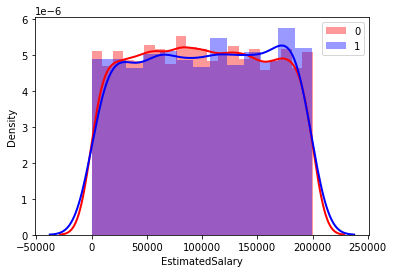

In [34]:
sns.distplot(df[df['Exited']==0]['EstimatedSalary'],color='red',kde_kws={'linewidth':2},label="0")
sns.distplot(df[df['Exited']==1]['EstimatedSalary'],color='blue',kde_kws={'linewidth':2},label="1")
plt.legend()

<div class="alert alert-block alert-info">

 #### _Both groups have a very similar distribution._ 
 #### _Esimated Salary might not be a very important infomation to decide if a customer will churn or not._

## 1 (D) : Studying the relationship between Age and Exited

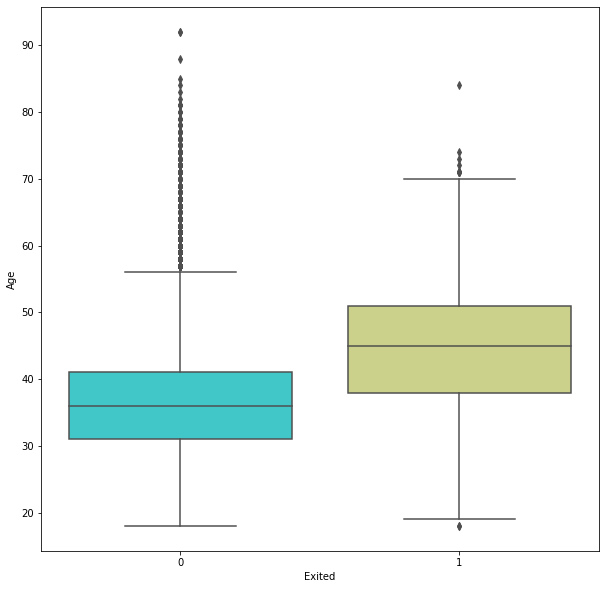

In [38]:
fig_dims = (10,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Exited',y='Age',ax=ax,data = df,palette='rainbow');

Text(0.5, 1.0, 'Age by churn')

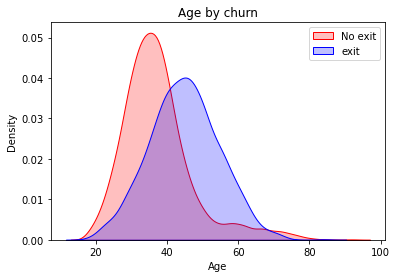

In [36]:
cs = sns.kdeplot(df.Age[(df["Exited"] == 0)],
                color="Red", shade = True)
cs = sns.kdeplot(df.Age[(df["Exited"] == 1)],
                ax = cs , color="Blue", shade = True)
cs.legend(["No exit","exit"], loc = 'upper right')
cs.set_ylabel('Density')
cs.set_xlabel('Age')
cs.set_title('Age by churn')

<div class="alert alert-block alert-info">
    
   #### - Non-churned customers have a right-skewed distribution (tend to be young).   
   #### -Churned customers are mostly around age 40 to 50 .  
   #### - Outliers above 60 years old maybe our stable customers.




## 2. Categorical & Categorical

## 2(A) : Studying the relationship between Geography and Exited

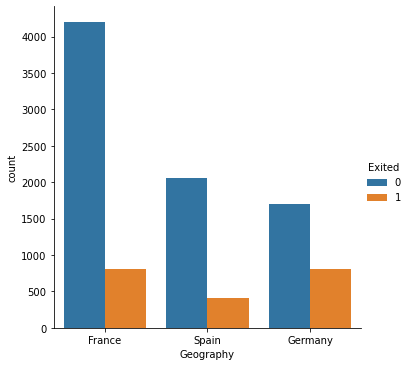

In [40]:
sns.catplot(x = "Geography", hue = "Exited", kind = "count", data = df)

In [43]:
crosstab = pd.crosstab(df["Geography"],df["Exited"],normalize="index") *100
crosstab

Exited,0,1
Geography,,
France,83.845233,16.154767
Germany,67.556796,32.443204
Spain,83.326605,16.673395


<div class="alert alert-block alert-info">

#### *INSIGHT : The ratio of non churners to churners belonging to France is 84:16 , ratio of non churners to churners belonging to Germany is 68:32 and the ratio of non churners to churners belonging to Spain is 83:17 therefore we conclude that customers belonging to Germany are more likely to churn as compared to France and Spain.*

## 2(B) : Studying the relationship between Gender and Exited


(0.0, 5000.0)

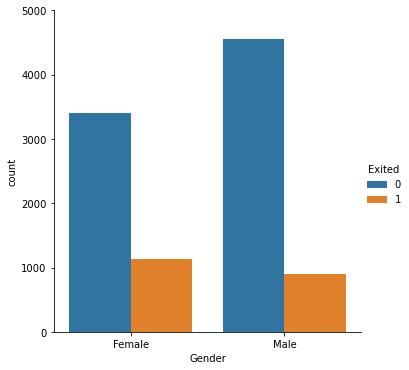

In [45]:
sns.catplot(x = "Gender", hue = "Exited", kind = "count", data = df)
plt.ylim(0,5000)

In [46]:
crosstab = pd.crosstab(df["Gender"],df["Exited"],normalize="index") *100
crosstab

Exited,0,1
Gender,,
Female,74.928461,25.071539
Male,83.544072,16.455928


<div class="alert alert-block alert-info">

    
#### *INSIGHT : The ratio of female non-churners to female churners is 75:25 whereas the ratio of male non-churners to male churners is 84:16.Therefore we conclude that females are more likely to churn as compared to males.*

## 2(C) : Studying the relationship between Tenure and Exited


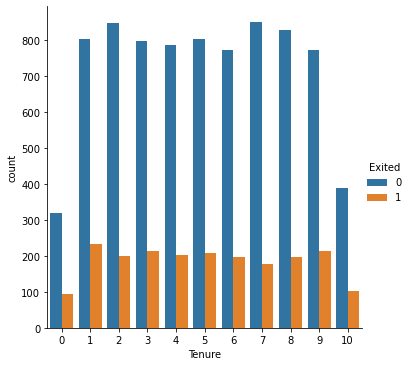

In [48]:
sns.catplot(x = "Tenure", hue = "Exited",kind = "count", data = df)

In [49]:
crosstab = pd.crosstab(df["Tenure"],df["Exited"],normalize="index") *100
crosstab

Exited,0,1
Tenure,,
0,76.997579,23.002421
1,77.584541,22.415459
2,80.820611,19.179389
3,78.889990,21.110010
4,79.474216,20.525784
5,79.347826,20.652174
6,79.731127,20.268873
7,82.782101,17.217899
8,80.780488,19.219512


<div class="alert alert-block alert-info">
    
#### _Almost same number of people in different tenure groups have exited the bank_
#### _Thus,Customers in different tenure groups don’t have an apparent tendency to churn or stay_



## 2(D) : Studying the relationship between Has Credit Card and Exited


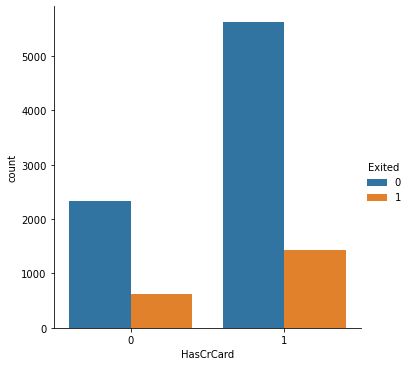

In [50]:
sns.catplot(x = "HasCrCard", hue = "Exited",kind = "count", data = df)

In [52]:
pd.crosstab(df['Exited'],df['HasCrCard'],normalize='columns')

HasCrCard,0,1
Exited,,
0,0.791851,0.798157
1,0.208149,0.201843


<div class="alert alert-block alert-info">

#### _Almost same number of customers(with or without credit card) have exited the bank._
    

## 2(E) : Studying the relationship between Number of Products and Exited


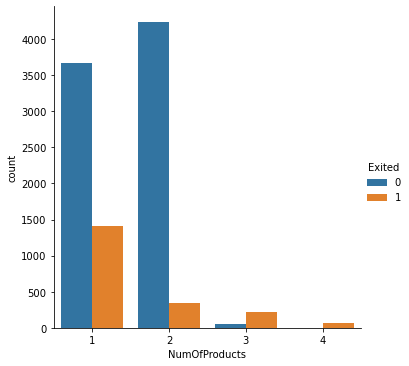

In [53]:
sns.catplot(x = "NumOfProducts", hue = "Exited",kind = "count", data = df)

In [54]:
pd.crosstab(df['Exited'],df['NumOfProducts'],normalize='columns')

NumOfProducts,1,2,3,4
Exited,,,,
0,0.722856,0.924183,0.172932,0.0
1,0.277144,0.075817,0.827068,1.0


<div class="alert alert-block alert-info">

#### _All the customers who bought 4 number of products have exited the bank. This might reflect on the poor services bank provided to their customers._
#### _Also customers having 3 or more number of products are more likely to churn than customers having 1 or 2 products._

## 2(F) : Studying the relationship between Is Active Member and Exited


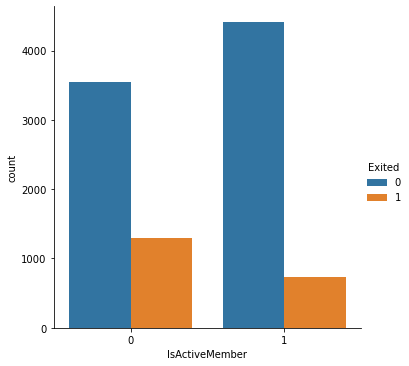

In [55]:
sns.catplot(x = "IsActiveMember", hue = "Exited",kind = "count", data = df)

In [56]:
pd.crosstab(df['Exited'],[df['Geography'],df['IsActiveMember']],normalize='columns')

Geography         France             Germany               Spain         
IsActiveMember         0         1         0         1         0        1
Exited                                                                   
0               0.788692  0.884986  0.589215  0.762821  0.766524  0.89253
1               0.211308  0.115014  0.410785  0.237179  0.233476  0.10747

<div class="alert alert-block alert-info">

#### _Customers in Germany are more likely to churn than customers in France and Spain_




<div class="alert alert-block alert-info">
    
## **<u>Test of association between 2 categorical variable using Chi-square test</u>**
    
    - Hypothesis:
         - Null Hypothesis : There is no relationship between two categorical values.  
         - Alternative Hypothesis: There is a relationship between two categorical values.    
     
            

</div>


In [62]:
print(pd.crosstab(df['Exited'],df['IsActiveMember']))
print('\n')
print(pd.crosstab(df['Exited'],df['NumOfProducts']))
print('\n')
print(pd.crosstab(df['Exited'],df['HasCrCard']))
print('\n')
print(pd.crosstab(df['Exited'],df['Gender']))
print('\n')
print(pd.crosstab(df['Exited'],df['Geography']))
print('\n')
print(pd.crosstab(df['Exited'],df['Tenure']))
print('\n')


IsActiveMember     0     1
Exited                    
0               3547  4416
1               1302   735


NumOfProducts     1     2    3   4
Exited                            
0              3675  4242   46   0
1              1409   348  220  60


HasCrCard     0     1
Exited               
0          2332  5631
1           613  1424


Gender  Female  Male
Exited              
0         3404  4559
1         1139   898


Geography  France  Germany  Spain
Exited                           
0            4204     1695   2064
1             810      814    413


Tenure   0    1    2    3    4    5    6    7    8    9    10
Exited                                                       
0       318  803  847  796  786  803  771  851  828  771  389
1        95  232  201  213  203  209  196  177  197  213  101




In [67]:
a=print("The Chi-sq statistic and p value for test of assocation between Exited and Activeness is: \n",chi2_contingency([[3547,4416],[1302,735]])[:2])
b=print("The Chi-sq statistic and p value for test of assocation between Exited and NumOfProducts is: \n",chi2_contingency([[3675,4242,46,0],[1409,348,220,60]])[:2])
c=print("The Chi-sq statistic and p value for test of assocation between Exited and Credit card possesion is: \n",chi2_contingency([[2332,5631],[613,1424]])[:2])
d=print("The Chi-sq statistic and p value for test of assocation between Exited and Geography is: \n",chi2_contingency([[4204,1695,2064],[810,814,413]])[:2])
e=print("The Chi-sq statistic and p value for test of assocation between Exited and Gender is: \n",chi2_contingency([[3404,4559],[1139,898]])[:2])
f=print("The Chi-sq statistic and p value for test of assocation between Exited and tenure is: \n",chi2_contingency([[318,803,847,796,786,803,771,851,828,771,389],[95,232,201,213,203,209,196,177,197,213,101]])[:2])

The Chi-sq statistic and p value for test of assocation between Exited and Activeness is: 
 (242.98534164287963, 8.785858269303703e-55)
The Chi-sq statistic and p value for test of assocation between Exited and NumOfProducts is: 
 (1503.6293615070408, 0.0)
The Chi-sq statistic and p value for test of assocation between Exited and Credit card possesion is: 
 (0.4713377990444081, 0.49237236141554686)
The Chi-sq statistic and p value for test of assocation between Exited and Geography is: 
 (301.2553368243453, 3.830317605354266e-66)
The Chi-sq statistic and p value for test of assocation between Exited and Gender is: 
 (112.91857062096116, 2.2482100097131755e-26)
The Chi-sq statistic and p value for test of assocation between Exited and tenure is: 
 (13.900372600390284, 0.17758462026413294)


<div class="alert alert-block alert-info">
    
#### Interpretating using p value and taking alpha as 0.05:
    1.Since p<0.05, we may reject H0 and conclude that there is a relation between Activeness and Exited. 
    2.Since p<0.05, we may reject H0 and conclude that there is a relation between Number of Products and Exited. 
    3.Since p>0.05, we may accept H0 and conclude that there is no relation between Credit Card and Exited.
    4.Since p<0.05, we may reject H0 and conclude that there is a relation between Geography and Exited.
    5.Since p<0.05, we may reject H0 and conclude that there is a relation between Gender and Exited.
    3.Since p>0.05, we may reject H0 and conclude that there is no relation between Tenure and Exited
           
                                        
The chi-square for Tenure and HasCrCard are pretty small, at the same time, their p-values are greater than 0.05, so it confirms our hypothesis that these two features will not provide useful information on the reponse (target) variable(i.e. churn). Thus we decided to drop these two variables.



### <u>Checking for Multicollinearity</u>
#### CORRELATION MATRIX

<AxesSubplot:>

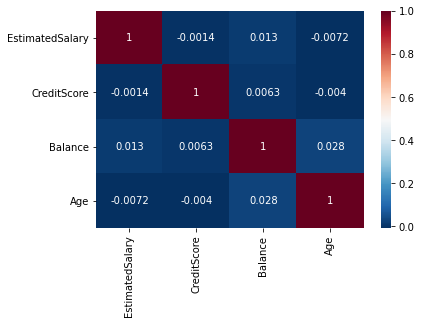

In [57]:
column=['EstimatedSalary','CreditScore','Balance','Age']
sns.heatmap(df[column].corr(),annot=True,cmap='RdBu_r')

<div class="alert alert-block alert-info">

There is not any high correlation between the continuous variables (i.e. no multicollinearity). So we’ll keep all the continuous variables.



### <u>Another way to check normality is to plot QQ Plot</u>
- A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight.
- The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. For example, if we run a statistical analysis that assumes our dependent variable is Normally distributed, we can use a Normal Q-Q plot to check that assumption. It’s just a visual check, not an air-tight proof, so it is somewhat subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation.

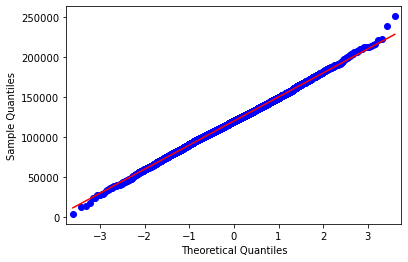

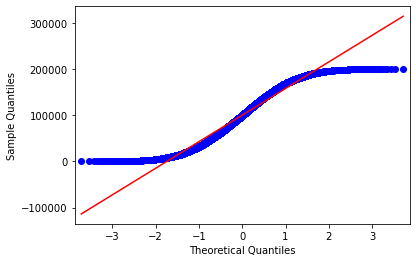

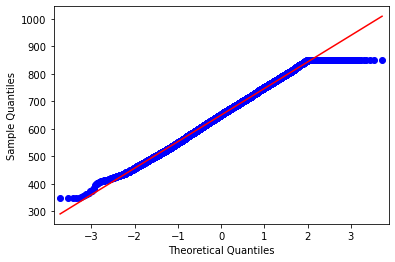

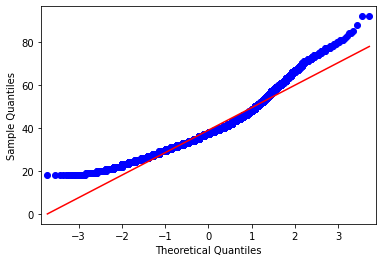

In [72]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df[df['Balance']!=0]['Balance'],line='s')
qqplot(df['EstimatedSalary'],line='s')
qqplot(df['CreditScore'],line='s')
qqplot(df['Age'],line='s')
plt.show()

<div class="alert alert-block alert-info">
 The QQ Plots are drawn in the following order:
    
    1.Balance (without including customers having zero balance)
    2.Estimated Salary
    3.Credit Score 
    4. Age

We infer the same result as while performing univariate analysis that only Balance (without including customers having zero balance) is fairly normally distributed.